In [1]:
import numpy as np
import imgaug
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection
import utilis

import keras_ocr

tf.compat.v1.disable_eager_execution()
tf.compat.v1.experimental.output_all_intermediates(True)

# tf.config.list_physical_devices('GPU')

# assert tf.test.is_gpu_available()

In [2]:
dataset_labels = utilis.get_lables_cf()[:-100]
print("Dataset len:", len(dataset_labels))
dataset_labels[:2]

Dataset len: 900


[('images_cf2/img_1.jpg', None, 'gfasdr21f43p025b'),
 ('images_cf2/img_2.jpg', None, 'clumvg24v76i467q')]

In [3]:
test_labels = utilis.get_lables_cf()[900:]
print("Test len:", len(test_labels))
test_labels[:2]

Test len: 100


[('images_cf2/img_901.jpg', None, 'iaagea01c16z548g'),
 ('images_cf2/img_902.jpg', None, 'funsct17f71z923e')]

In [4]:
# recognizer_alphabet = recognizer.alphabet
# recognizer_alphabet = recognizer_alphabet[:12] + './-()'+recognizer_alphabet[12:]
# recognizer_alphabet
alphabet = '0123456789abcdefghijklmnopqrstuvwxyz'
recognizer_alphabet = ''.join(sorted(set(alphabet.lower())))
recognizer_alphabet

'0123456789abcdefghijklmnopqrstuvwxyz'

In [5]:
recognizer = keras_ocr.recognition.Recognizer(
    alphabet=recognizer_alphabet,
    weights='kurapan'
)
recognizer.compile()

Instructions for updating:
Colocations handled automatically by placer.


2024-02-27 12:34:07.487600: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2024-02-27 12:34:07.506503: W tensorflow/c/c_api.cc:305] Operation '{name:'conv2d_1/bias/Assign' id:364 op device:{requested: '', assigned: ''} def:{{{node conv2d_1/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv2d_1/bias, conv2d_1/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Looking for /Users/gmarini/.keras-ocr/crnn_kurapan.h5


2024-02-27 12:34:08.067982: W tensorflow/c/c_api.cc:305] Operation '{name:'fc_12/bias/Assign' id:1876 op device:{requested: '', assigned: ''} def:{{{node fc_12/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](fc_12/bias, fc_12/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [6]:
# augmenter = imgaug.augmenters.Sequential([
#     imgaug.augmenters.GammaContrast(gamma=(0.25, 3.0)),
# ])

train_labels, validation_labels = sklearn.model_selection.train_test_split(dataset_labels, test_size=0.2, random_state=42)

print("Train len:", len(train_labels))
print("Train example:", train_labels[:2])
print("Validation len", len(validation_labels))


Train len: 720
Train example: [('images_cf2/img_11.jpg', None, 'cdcgeq32v33v876t'), ('images_cf2/img_335.jpg', None, 'gamiam52v17b413i')]
Validation len 180


In [7]:
batch_size = 8

(training_image_gen, training_steps), (validation_image_gen, validation_steps) = [
    (
        keras_ocr.datasets.get_recognizer_image_generator(
            labels=labels,
            height=recognizer.model.input_shape[1],
            width=recognizer.model.input_shape[2],
            # height=28,
            # width=350,
            alphabet=recognizer_alphabet,
            # augmenter=augmenter
        ),
        len(labels) // batch_size
    ) for labels, augmenter in [(train_labels, None), (validation_labels, None)]     
]


print(recognizer.model.input_shape)


(None, 31, 200, 1)


In [8]:
print(training_image_gen, training_steps)
print(validation_image_gen, validation_steps)

<generator object get_recognizer_image_generator at 0x2869c1f50> 90
<generator object get_recognizer_image_generator at 0x2869c2260> 22


In [9]:
training_gen, validation_gen = [
    recognizer.get_batch_generator(
        image_generator=image_generator,
    )
    for image_generator in [training_image_gen, validation_image_gen]
]

text: fvizde85b98f939e


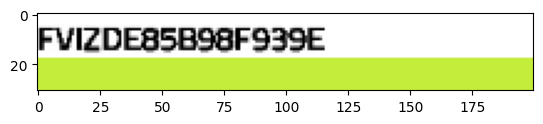

In [10]:
image, text = next(training_image_gen)
print('text:', text)
_ = plt.imshow(image)

text: llqiaq89l08v012t


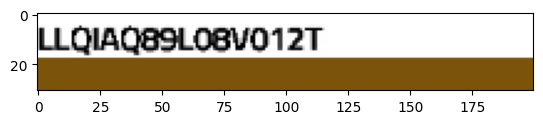

In [11]:
image, text = next(validation_image_gen)
print('text:', text)
_ = plt.imshow(image)

In [12]:
# RECOGNIZER LOAD_MODEL / FIT
# recognizer.model = tf.keras.models.load_model('modelli_allenati/recogn_model_colab_05')

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, restore_best_weights=False),
    # tf.keras.callbacks.ModelCheckpoint('recognizer_borndigital.h5', monitor='val_loss', save_best_only=True),
    tf.keras.callbacks.CSVLogger('recognizer_borndigital.csv')
]
recognizer.training_model.fit(
    training_gen,
    steps_per_epoch=training_steps,
    validation_steps=validation_steps,
    validation_data=validation_gen,
    callbacks=callbacks,
    epochs=50,
)

Epoch 1/50


2024-02-27 12:34:09.027349: W tensorflow/c/c_api.cc:305] Operation '{name:'bn_7/AssignMovingAvg_1/AssignSubVariableOp' id:320 op device:{requested: '', assigned: ''} def:{{{node bn_7/AssignMovingAvg_1/AssignSubVariableOp}} = AssignSubVariableOp[_class=["loc:@bn_7/moving_variance"], _has_manual_control_dependencies=true, dtype=DT_FLOAT](bn_7/moving_variance, bn_7/AssignMovingAvg_1/mul)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2024-02-27 12:34:09.152734: W tensorflow/c/c_api.cc:305] Operation '{name:'training/RMSprop/lstm_11_back/lstm_cell/bias/rms/Assign' id:3454 op device:{requested: '', assigned: ''} def:{{{node training/RMSprop/lstm_11_back/lstm_cell/bias/rms/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/RMSprop/lstm_11_back/lstm_cell/bias/rms, tra

90/90 [==============================] - ETA: 0s - batch: 44.5000 - size: 8.0000 - loss: 33.0738

/Users/gmarini/.pyenv/versions/3.10.6/envs/py_AutoQuote/lib/python3.10/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2024-02-27 12:35:38.767345: W tensorflow/c/c_api.cc:305] Operation '{name:'loss/mul' id:2352 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/lambda_3_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


90/90 [==============================] - 97s 1s/step - batch: 44.5000 - size: 8.0000 - loss: 33.0738 - val_loss: 26.1083
Epoch 2/50
90/90 [==============================] - 97s 1s/step - batch: 44.5000 - size: 8.0000 - loss: 13.9210 - val_loss: 12.1900
Epoch 3/50
90/90 [==============================] - 97s 1s/step - batch: 44.5000 - size: 8.0000 - loss: 9.3632 - val_loss: 8.5952
Epoch 4/50
90/90 [==============================] - 97s 1s/step - batch: 44.5000 - size: 8.0000 - loss: 6.2382 - val_loss: 8.7147
Epoch 5/50
90/90 [==============================] - 97s 1s/step - batch: 44.5000 - size: 8.0000 - loss: 5.0798 - val_loss: 5.5904
Epoch 6/50
90/90 [==============================] - 97s 1s/step - batch: 44.5000 - size: 8.0000 - loss: 3.5584 - val_loss: 6.8617
Epoch 7/50
90/90 [==============================] - 97s 1s/step - batch: 44.5000 - size: 8.0000 - loss: 3.4423 - val_loss: 4.5832
Epoch 8/50
90/90 [==============================] - 97s 1s/step - batch: 44.5000 - size: 8.0000 -

In [18]:
recognizer2 = keras_ocr.recognition.Recognizer(
    alphabet=recognizer_alphabet,
    weights='kurapan'
)
recognizer2.compile()

2024-02-27 14:36:28.208157: W tensorflow/c/c_api.cc:305] Operation '{name:'conv_5_2/bias/Assign' id:6801 op device:{requested: '', assigned: ''} def:{{{node conv_5_2/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv_5_2/bias, conv_5_2/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Looking for /Users/gmarini/.keras-ocr/crnn_kurapan.h5


2024-02-27 14:36:29.153897: W tensorflow/c/c_api.cc:305] Operation '{name:'lstm_10_2/lstm_cell/kernel/Assign' id:7488 op device:{requested: '', assigned: ''} def:{{{node lstm_10_2/lstm_cell/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](lstm_10_2/lstm_cell/kernel, lstm_10_2/lstm_cell/kernel/Initializer/stateless_truncated_normal)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Predicted nuovo:   uzilta57t23b059o, Actual: uzilta57t23b059o
Uguali:  True

Predicted vecchio: uziltastobose, Actual: uzilta57t23b059o
Uguali:  False


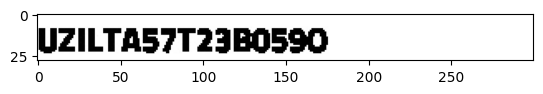

In [24]:
image_filepath, _, actual = test_labels[np.random.randint(0,  len(test_labels))]
predicted = recognizer.recognize(image_filepath)
print(f'Predicted nuovo:   {predicted}, Actual: {actual}')
print("Uguali: ",predicted == actual)
print()


predicted2 = recognizer2.recognize(image_filepath)
print(f'Predicted vecchio: {predicted2}, Actual: {actual}')
print("Uguali: ",predicted2 == actual)
_ = plt.imshow(keras_ocr.tools.read(image_filepath))

In [46]:
# SAVE MODEL
# recognizer.model.save('modelli_allenati/recognizer_model_cf2')

[255 255 255]


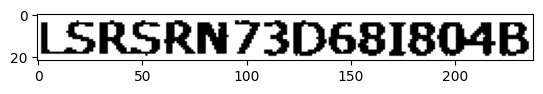

Predicted nuovo:   lsrls5rn775ldoo1oo4d
[255 255 255]


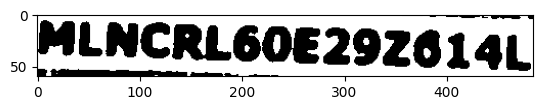

Predicted nuovo:   lnvcrl6o7e209z7o1l4l
[255 255 255]


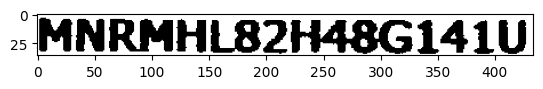

Predicted nuovo:   mnrm1h1l3z2418c1411u


In [56]:
import cv2

path = 'img_417.png'
original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
bin = cv2.threshold(original,90,255,cv2.THRESH_BINARY)[1]
cv2.imwrite("temp.jpg",bin)
img_read_temp = cv2.imread("temp.jpg")
final_bin_rgb = cv2.threshold(img_read_temp,127,255,cv2.THRESH_BINARY)[1]
print(final_bin_rgb[1][1])
plt.imshow(final_bin_rgb, 'gray')
plt.show()
predicted = recognizer.recognize(final_bin_rgb)
print(f'Predicted nuovo:   {predicted}')


path = 'img_262.png'
original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
bin = cv2.threshold(original,90,255,cv2.THRESH_BINARY)[1]
cv2.imwrite("temp.jpg",bin)
img_read_temp = cv2.imread("temp.jpg")
final_bin_rgb = cv2.threshold(img_read_temp,127,255,cv2.THRESH_BINARY)[1]
print(final_bin_rgb[1][1])
plt.imshow(final_bin_rgb, 'gray')
plt.show()
predicted = recognizer.recognize(final_bin_rgb)
print(f'Predicted nuovo:   {predicted}')

path = 'img_12.png'
original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
bin = cv2.threshold(original,80,255,cv2.THRESH_BINARY)[1]
cv2.imwrite("temp.jpg",bin)
img_read_temp = cv2.imread("temp.jpg")
final_bin_rgb = cv2.threshold(img_read_temp,127,255,cv2.THRESH_BINARY)[1]
print(final_bin_rgb[1][1])
plt.imshow(final_bin_rgb, 'gray')
plt.show()
predicted = recognizer.recognize(final_bin_rgb)
print(f'Predicted nuovo:   {predicted}')


In [50]:
recognizer3 = keras_ocr.recognition.Recognizer(
    alphabet=recognizer_alphabet,
    weights='kurapan'
)
recognizer3.model = tf.keras.models.load_model('modelli_allenati/recognizer_model_cf')
recognizer3.compile()


2024-02-27 15:00:11.384198: W tensorflow/c/c_api.cc:305] Operation '{name:'conv_6_6/bias/Assign' id:16154 op device:{requested: '', assigned: ''} def:{{{node conv_6_6/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv_6_6/bias, conv_6_6/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Looking for /Users/gmarini/.keras-ocr/crnn_kurapan.h5


2024-02-27 15:00:13.337742: W tensorflow/c/c_api.cc:305] Operation '{name:'lstm_10_back_6/lstm_cell/recurrent_kernel/Assign' id:17041 op device:{requested: '', assigned: ''} def:{{{node lstm_10_back_6/lstm_cell/recurrent_kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](lstm_10_back_6/lstm_cell/recurrent_kernel, lstm_10_back_6/lstm_cell/recurrent_kernel/Initializer/mul_1)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2024-02-27 15:00:17.405572: W tensorflow/c/c_api.cc:305] Operation '{name:'AssignVariableOp_382' id:18829 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node AssignVariableOp_382}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false, _device="/device:CPU:0"](lstm_cell_6/kernel, Identity_195)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


[255 255 255]


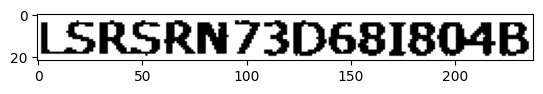

Predicted nuovo:   srsrnzbdsisob
[255 255 255]


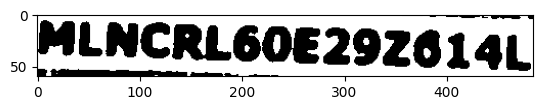

Predicted nuovo:   mlncrlegoezzo16l
[255 255 255]


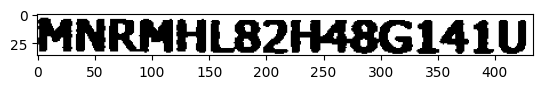

Predicted nuovo:   mnrmhlezhasgiau


In [53]:
path = 'img_417.png'
original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
bin = cv2.threshold(original,90,255,cv2.THRESH_BINARY)[1]
cv2.imwrite("temp.jpg",bin)
img_read_temp = cv2.imread("temp.jpg")
final_bin_rgb = cv2.threshold(img_read_temp,127,255,cv2.THRESH_BINARY)[1]
print(final_bin_rgb[1][1])
plt.imshow(final_bin_rgb, 'gray')
plt.show()
predicted = recognizer3.recognize(final_bin_rgb)
print(f'Predicted nuovo:   {predicted}')


path = 'img_262.png'
original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
bin = cv2.threshold(original,90,255,cv2.THRESH_BINARY)[1]
cv2.imwrite("temp.jpg",bin)
img_read_temp = cv2.imread("temp.jpg")
final_bin_rgb = cv2.threshold(img_read_temp,127,255,cv2.THRESH_BINARY)[1]
print(final_bin_rgb[1][1])
plt.imshow(final_bin_rgb, 'gray')
plt.show()
predicted = recognizer3.recognize(final_bin_rgb)
print(f'Predicted nuovo:   {predicted}')

path = 'img_12.png'
original = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
bin = cv2.threshold(original,90,255,cv2.THRESH_BINARY)[1]
cv2.imwrite("temp.jpg",bin)
img_read_temp = cv2.imread("temp.jpg")
final_bin_rgb = cv2.threshold(img_read_temp,127,255,cv2.THRESH_BINARY)[1]
print(final_bin_rgb[1][1])
plt.imshow(final_bin_rgb, 'gray')
plt.show()
predicted = recognizer3.recognize(final_bin_rgb)
print(f'Predicted nuovo:   {predicted}')